In [2]:
import scipy
import numpy as np
import scipy.signal
import scipy.ndimage
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew
import pandas as pd

Text(0.5, 1.0, 'ecg_normal')

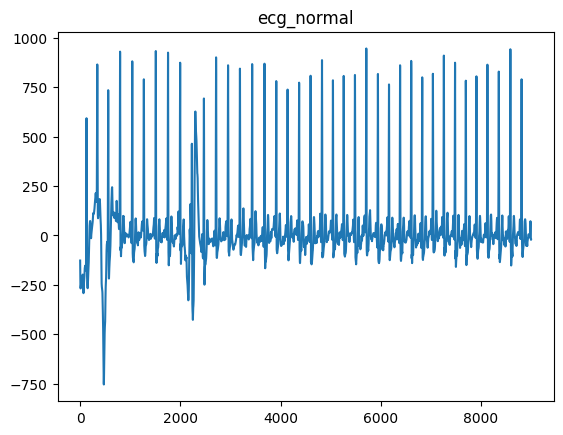

In [3]:
mat3 = scipy.io.loadmat('A00001.mat')
ecg3 = mat3.get('val')
plt.plot(ecg3[0])
plt.title('ecg_normal')

Text(0.5, 1.0, 'ecg_noisy')

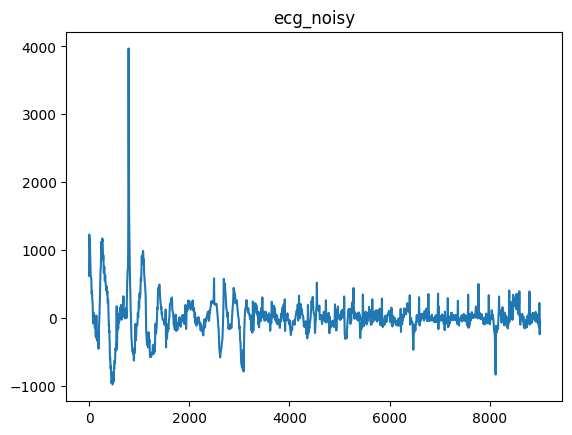

In [4]:
mat2 = scipy.io.loadmat('A00022.mat')
ecg2 = mat2.get('val')
plt.plot(ecg2[0])
plt.title('ecg_noisy')

Text(0.5, 1.0, 'ecg_af')

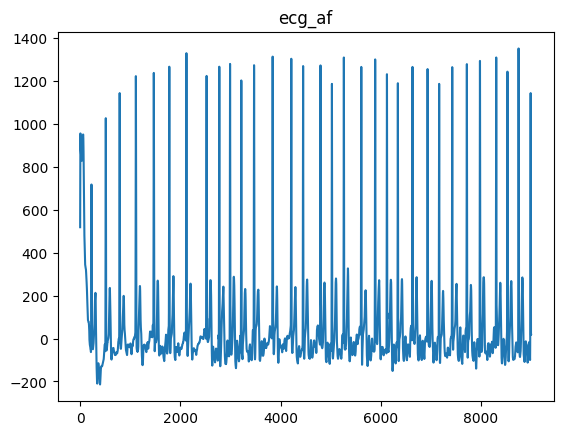

In [5]:
mat1 = scipy.io.loadmat('A00004.mat')
ecg1 = mat1.get('val')
plt.plot(ecg1[0])
plt.title('ecg_af')

Text(0.5, 1.0, 'ecg_others')

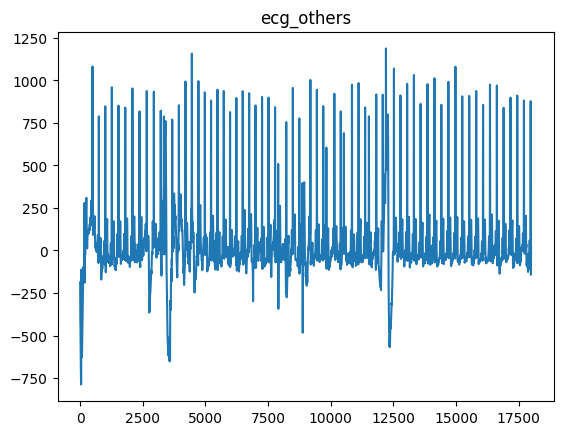

In [6]:
mat4 = scipy.io.loadmat('A00008.mat')
ecg4 = mat4.get('val')
plt.plot(ecg4[0])
plt.title('ecg_others')

In [7]:
from rpeakdetectr.rpeakdetect import detect_beats, plot_peak_detection

In [8]:
rr1 = detect_beats(ecg1[0], 300)
rr2 = detect_beats(ecg2[0], 300)
rr3 = detect_beats(ecg3[0], 300)
rr4 = detect_beats(ecg4[0], 300)

c:\Users\Paras\Desktop\DSP_tutorial\Tutorial 5\rpeakdetectr\rpeakdetect.py:76: RuntimeWarning: divide by zero encountered in log
  shannon_energy = -square_decg_power*np.log(square_decg_power)
c:\Users\Paras\Desktop\DSP_tutorial\Tutorial 5\rpeakdetectr\rpeakdetect.py:76: RuntimeWarning: invalid value encountered in multiply
  shannon_energy = -square_decg_power*np.log(square_decg_power)


In [9]:
print(rr1)

[ 224  510  786 1110 1467 1776 2118 2520 2774 2990 3214 3468 3839 4210
 4447 4794 5022 5260 5608 5885 6120 6337 6630 6931 7162 7423 7715 7977
 8301 8525 8747]


In [10]:
pr1 = np.diff(rr1)
pr2 = np.diff(rr2)
pr3 = np.diff(rr3)
pr4 = np.diff(rr4)

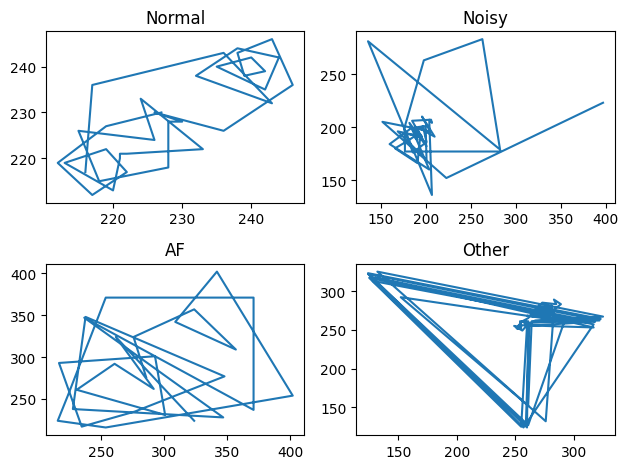

In [11]:
figure,axis = plt.subplots(2,2)
axis[0,0].plot(pr3[0:-2],pr3[1:-1])
axis[0,0].set_title('Normal')

axis[0,1].plot(pr2[0:-2],pr2[1:-1])
axis[0,1].set_title('Noisy')

axis[1,0].plot(pr1[0:-2],pr1[1:-1])
axis[1,0].set_title('AF')

axis[1,1].plot(pr4[0:-2],pr4[1:-1])
axis[1,1].set_title('Other')

plt.tight_layout()
plt.show()

In [12]:
# Find the mean, std, kurtosis, skewness, energy
# Dispersion stepping

In [13]:
# function for stepping
def stepping(li):
    denominator = sum(li)/(len(li))
    num1 = [np.sqrt(np.square((li[i]-li[i+1]))+np.square((li[i+1]-li[i+2]))) for i in range(len(li)-2)]
    numerator = sum(num1)/(len(li)-2)
    stepping = numerator/denominator
    return stepping

In [ ]:
def dispersion():

In [17]:
# Computation
def data(RR, ECG, type):
    """This function takes RR, ECG value and gives mean, std, kurtosis, skew as a dataframe
    """
    mean_ECG = np.mean(ECG)
    mean_RR = np.mean(RR)
    std_ECG = np.std(ECG)
    std_RR = np.std(RR)
    kur_ECG = kurtosis(ECG)
    kur_RR = kurtosis(RR)
    skew_ECG = skew(ECG)
    skew_RR = skew(RR)
    data = {"ECG Mean":mean_ECG, "RR Mean":mean_RR,"STD ECG":std_ECG, "STD RR": std_RR, "kurtosis ECG":kur_ECG, "kurtosis RR":kur_RR, "skew ECG":skew_ECG, "skew RR":skew_RR, "Step":stepping(np.diff(RR))}
    return data
    
    

In [ ]:
class ECG:
    def __init__(self, mat):
        self.mat = mat
        self.ecg_signal = self.mat.get("val")

    